<a href="https://colab.research.google.com/github/Kofoorogun/EDA-Projects/blob/main/womens_world_cup_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATORY DATA ANALYSIS OF THE FIFA Women's World Cup Stats (1991 - 2019)

The dataset was obtained from Kaggle cleaned for analysis.

In [ ]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# auto reload imports
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Importing and loading the dataset

In [ ]:
df = pd.read_csv("cleaned_wwc_data31.csv")
df.head()

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,2,1,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,8,4,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,7,3,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,3,3,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,4,3,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75


In [ ]:
RANDOM_STATE = 123
df.sample(n=10, random_state = RANDOM_STATE)

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
132,133,Nigeria,1991,17,18.2,49.25,3,33,240,2.7,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.00
88,89,Japan,2003,16,24.2,54.70,3,33,270,3.0,7,0,7,0,0,0.0,0.0,2.33,0.00,2.33,2.33,2.33
101,102,Germany,1999,18,24.4,49.25,4,44,360,4.0,11,4,11,0,0,0.0,0.0,2.75,1.00,3.75,2.75,3.75
129,130,Italy,1991,17,24.2,49.25,4,44,340,3.8,8,5,8,0,0,0.0,0.0,2.12,1.32,3.44,2.12,3.44
4,5,Canada,2019,16,27.0,63.00,4,44,360,4.0,4,3,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75
120,121,Nigeria,1995,16,20.6,49.25,3,33,270,3.0,5,0,5,0,0,0.0,0.0,1.67,0.00,1.67,1.67,1.67
74,75,Korea DPR,2007,15,22.8,52.80,4,44,360,4.0,5,1,5,0,0,0.0,0.0,1.25,0.25,1.50,1.25,1.50
100,101,Denmark,1999,17,25.5,49.25,3,33,270,3.0,1,0,1,0,0,0.0,0.0,0.33,0.00,0.33,0.33,0.33
128,129,Germany,1991,18,23.8,49.25,6,66,500,5.6,13,9,12,1,1,0.0,0.0,2.34,1.62,3.96,2.16,3.78
0,1,Argentina,2019,18,26.8,34.70,3,33,270,3.0,2,1,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67


In [ ]:
# Make a copy of the dataset
df_1 = df.copy()
df_1.head()

,id,squad,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,Argentina,2019,18,26.8,34.7,3,33,270,3.0,2,1,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,Australia,2019,18,25.4,61.3,4,44,390,4.3,8,4,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,Brazil,2019,18,29.7,51.5,4,44,390,4.3,7,3,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,Cameroon,2019,20,27.7,36.0,4,44,360,4.0,3,3,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,Canada,2019,16,27.0,63.0,4,44,360,4.0,4,3,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75


In [ ]:
df_1.describe()

,id,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,68.500000,2007.117647,17.330882,25.274265,49.251471,4.176471,45.941176,378.147059,4.200735,6.566176,3.154412,6.161765,0.404412,0.463235,1.132353,0.036765,1.375735,0.651324,2.027574,1.294265,1.946397
std,39.403892,9.159540,1.712936,1.962462,5.523780,1.298902,14.287920,122.916565,1.361780,5.764132,3.612486,5.528674,0.754038,0.859872,2.054115,0.188879,0.923320,0.633787,1.405935,0.898872,1.365997
min,1.000000,1991.000000,13.000000,18.200000,30.000000,3.000000,33.000000,240.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.750000,1999.000000,16.000000,24.275000,48.075000,3.000000,33.000000,270.000000,3.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,1.000000,0.600000,0.787500
50%,68.500000,2007.000000,17.000000,25.300000,49.250000,4.000000,44.000000,360.000000,4.000000,5.000000,2.000000,4.500000,0.000000,0.000000,0.000000,0.000000,1.250000,0.500000,1.750000,1.075000,1.725000
75%,102.250000,2015.000000,18.000000,26.800000,51.850000,5.000000,55.000000,480.000000,5.300000,10.000000,5.000000,9.000000,1.000000,1.000000,1.250000,0.000000,1.947500,1.000000,3.000000,1.800000,3.000000
max,136.000000,2019.000000,23.000000,29.700000,63.000000,7.000000,77.000000,690.000000,7.700000,25.000000,17.000000,25.000000,4.000000,4.000000,8.000000,1.000000,4.690000,2.430000,6.750000,4.500000,6.560000


In [ ]:
df_1["squad"].unique(), df_1["squad"].nunique()

(array(['Argentina', 'Australia', 'Brazil', 'Cameroon', 'Canada', 'Chile',
        'China PR', 'England', 'France', 'Germany', 'Italy', 'Jamaica',
        'Japan', 'Korea Rep', 'Netherlands', 'New Zealand', 'Nigeria',
        'Norway', 'Scotland', 'South Africa', 'Spain', 'Sweden',
        'Thailand', 'USA', 'Colombia', 'Costa Rica', "Côte d'Ivoire",
        'Ecuador', 'Mexico', 'Switzerland', 'Equ. Guinea', 'Korea DPR',
        'Denmark', 'Ghana', 'Russia', 'Chinese Taipei'], dtype=object), 36)

In [ ]:
df_1["year"].unique(), df_1["year"].nunique(), df_1["year"].value_counts()

(array([2019, 2015, 2011, 2007, 2003, 1999, 1995, 1991]), 8, 2019    24
 2015    24
 2011    16
 2007    16
 2003    16
 1999    16
 1995    12
 1991    12
 Name: year, dtype: int64)

In [ ]:
df_1["players"].unique(), df_1["players"].nunique()

(array([18, 20, 16, 17, 22, 19, 21, 15, 23, 14, 13]), 11)

In [ ]:
df_1["age"].unique(), df_1["age"].nunique(), df_1["age"].count()#, df_1["age"].value_counts()

(array([26.8, 25.4, 29.7, 27.7, 27. , 26.6, 27.8, 25.5, 26.5, 22.9, 24.8,
        26.9, 26.1, 27.6, 25.7, 26.4, 27.5, 25.2, 28.5, 28.8, 23.6, 27.4,
        25.1, 27.2, 24.3, 25. , 23.4, 27.3, 27.9, 24.9, 24.6, 26.7, 25.3,
        28.1, 28.4, 22.8, 25.9, 22.4, 21.1, 23.1, 24.4, 24.7, 28.3, 21. ,
        23.8, 24.5, 26.3, 23. , 22.7, 24.2, 22.2, 21.5, 23.5, 25.6, 26.2,
        21.3, 22.6, 20.6, 24.1, 22.1, 21.2, 18.2]), 62, 136)

In [ ]:
df_1["matches_played"].unique(), df_1["matches_played"].nunique()

(array([3, 4, 7, 5, 6]), 5)

In [ ]:
df_1["goals"].unique(), df_1["goals"].nunique()

(array([ 2,  8,  7,  3,  4,  1, 13, 10,  9, 11,  0,  5, 12, 25, 20, 14,  6,
        16, 15, 19, 17, 23]), 22)

### Split dataset into numerical and categorical columns

In [ ]:
# Categorical columns
df_1cat = df_1.select_dtypes(include = "O")
df_1cat.head()

,squad
0,Argentina
1,Australia
2,Brazil
3,Cameroon
4,Canada


In [ ]:
# Numerical columns
df_1num = df_1.select_dtypes(exclude = "O")
df_1num.head()

,id,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
0,1,2019,18,26.8,34.7,3,33,270,3.0,2,1,1,1,1,3.0,0.0,0.67,0.33,1.00,0.33,0.67
1,2,2019,18,25.4,61.3,4,44,390,4.3,8,4,8,0,1,2.0,0.0,1.85,0.92,2.77,1.85,2.77
2,3,2019,18,29.7,51.5,4,44,390,4.3,7,3,5,2,3,7.0,0.0,1.62,0.69,2.31,1.15,1.85
3,4,2019,20,27.7,36.0,4,44,360,4.0,3,3,3,0,0,6.0,0.0,0.75,0.75,1.50,0.75,1.50
4,5,2019,16,27.0,63.0,4,44,360,4.0,4,3,4,0,1,2.0,0.0,1.00,0.75,1.75,1.00,1.75


## Exploration of the variables

### Univariate Analysis

In [ ]:
def plot_histogram (*, data: pd.DataFrame, feature: str, text: str = ""):
  """This returns a seaborn histogram"""
  plt.figure(figsize=(6, 6))
  sns.histplot(data=data, x=feature)
  plt.title(f"Distribution of {feature!r} {text}", size=16)
  plt.tight_layout()
  plt.show()


def plot_boxplot (*, data: pd.DataFrame, feature: str, feature2: str, text: str = ""):
  """This returns a seaborn boxplot"""
  sns.boxplot(data=data, x=feature, y=feature2)
  plt.title(f"Boxplot of {feature!r} {text}", size=16)
  plt.tight_layout()
  plt.show()


def plot_scatterplot(*, data: pd.DataFrame, x: str, y: str, text: str = ""):
  plt.scatter(x, y, data=data)
  plt.title(f"Scatter plot of {x!r} and {y!r}", size=16)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()


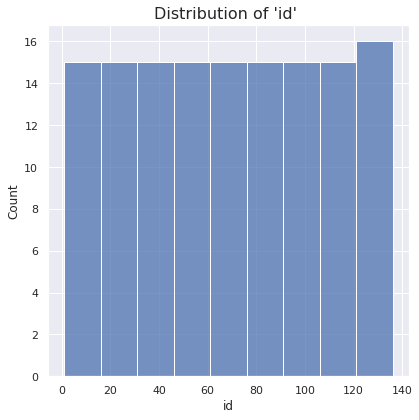

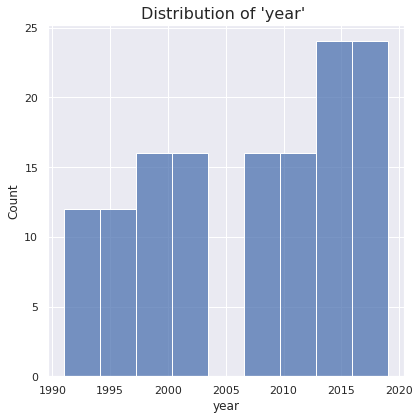

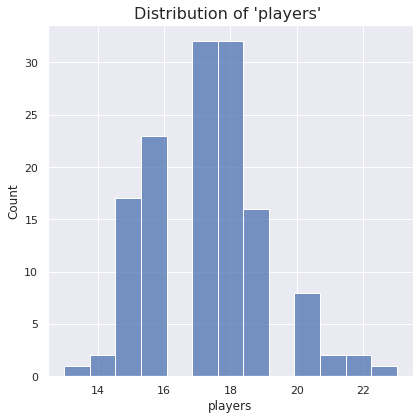

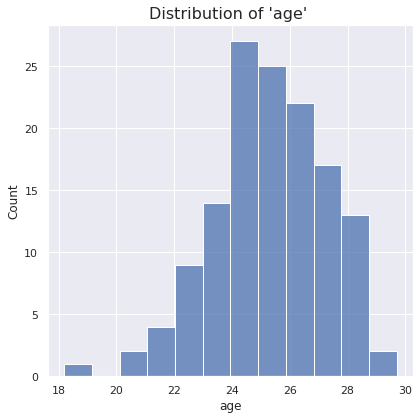

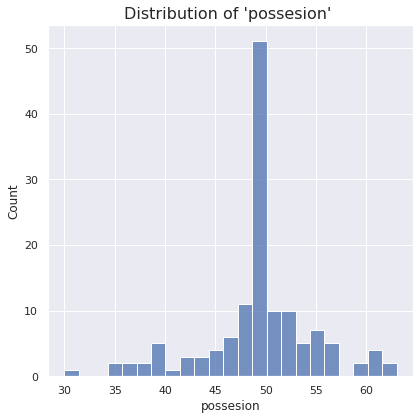

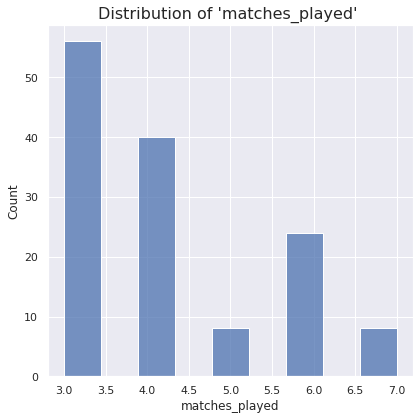

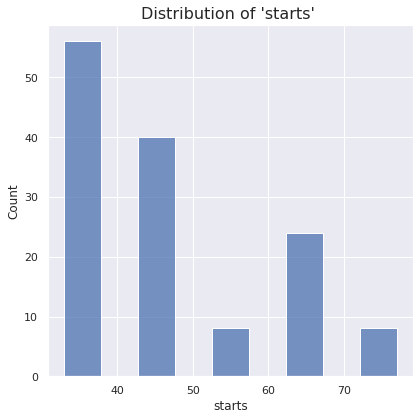

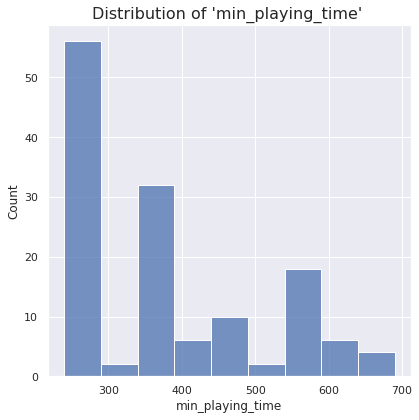

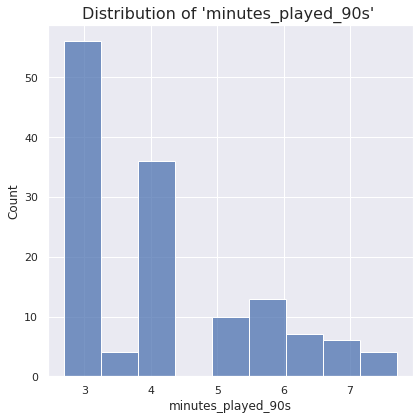

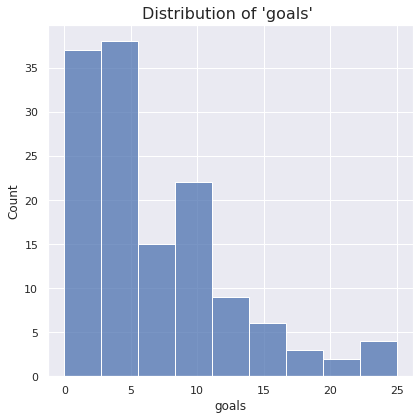

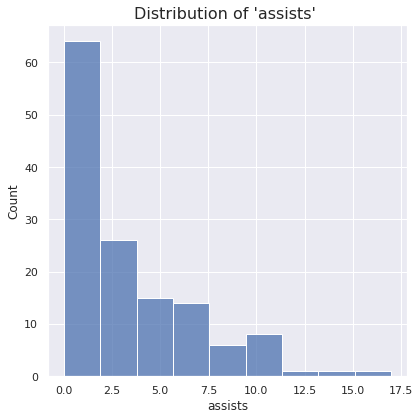

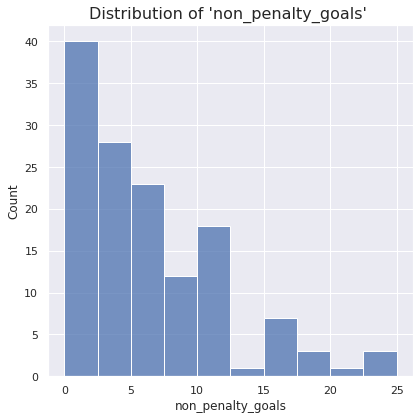

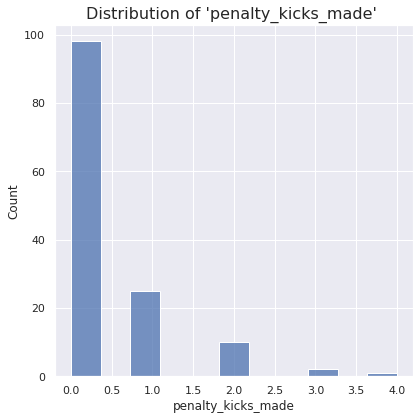

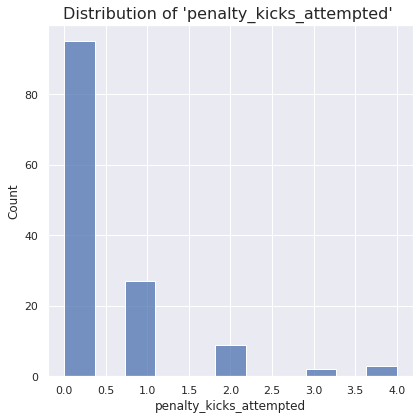

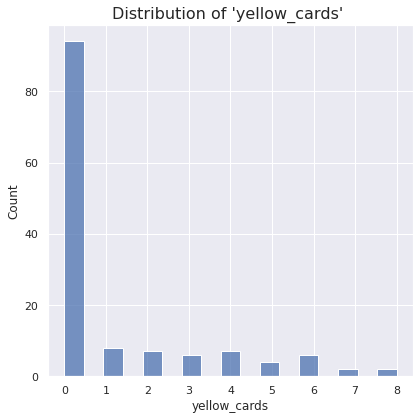

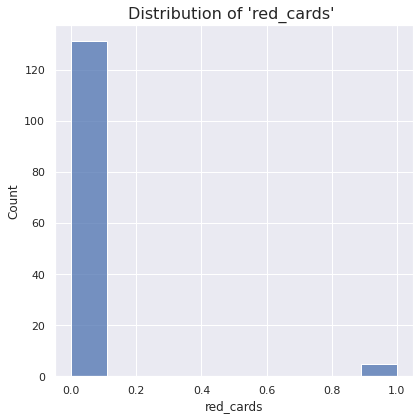

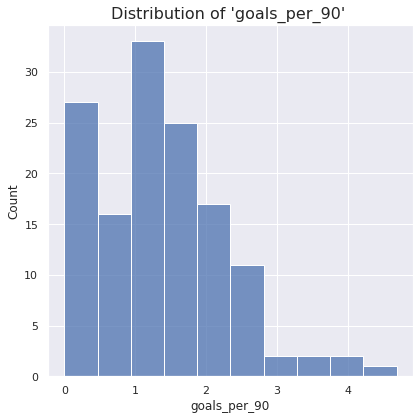

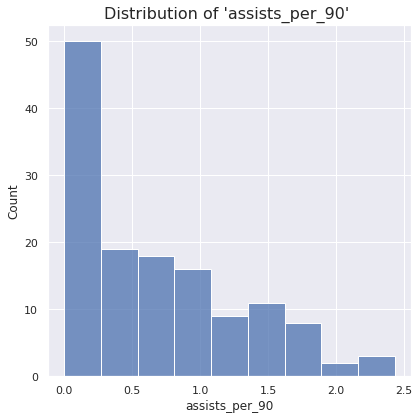

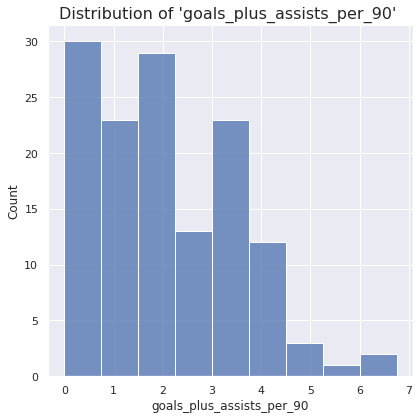

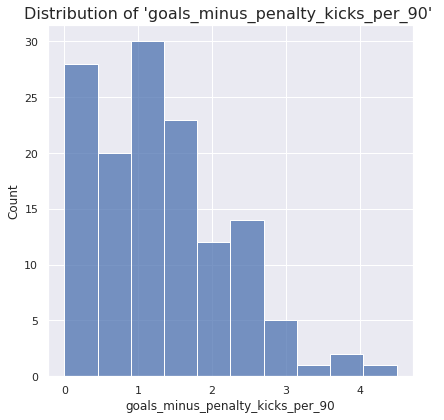

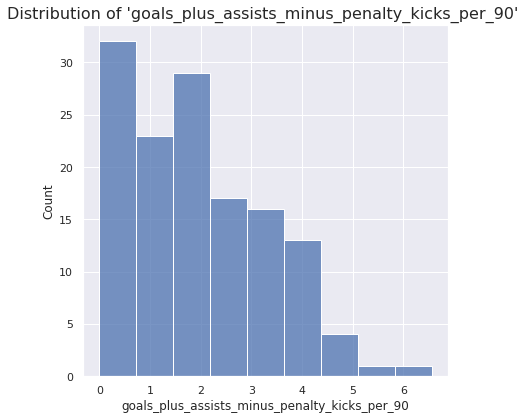

In [ ]:
# Histogram showing distribution of all numeric variables
for var in df_1num:
        plot_histogram(data=df_1num, feature=var)

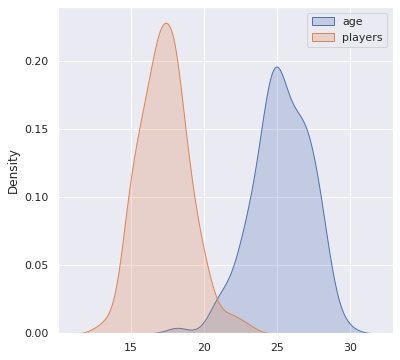

In [ ]:
plt.figure(figsize=(6, 6))
sns.kdeplot(df_1['age'], fill=True)
sns.kdeplot(df_1['players'], fill=True)
plt.legend(['age', 'players'])
plt.xlabel(None)
plt.show()

The KDE plot shows the distribution of age and players, which have similar shapes hence similar distribution. The average mean of each variable has the highest density, hence have the highest occurence.

### Bivariate analysis

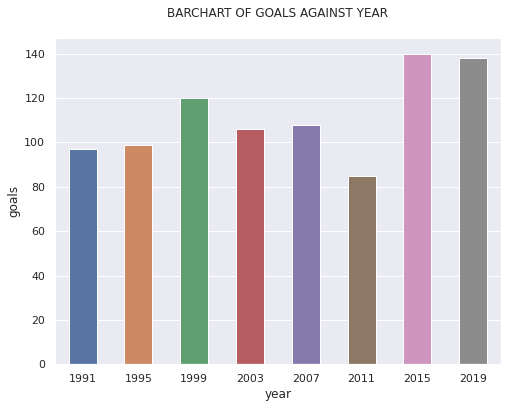

In [ ]:
# Barchart of goals against years when the women's world cup were held
plt.figure(figsize=(8,6))
sns.barplot(x=df_1['year'], y=df_1['goals'], errorbar=None, width=0.5, estimator=sum)
plt.title("BARCHART OF GOALS AGAINST YEAR\n")
plt.xlabel("year")
plt.ylabel("goals")
plt.show()


The barchart above shows that the year with the most no of goals scored is 2019, and the year with the least goals scored is 2011.

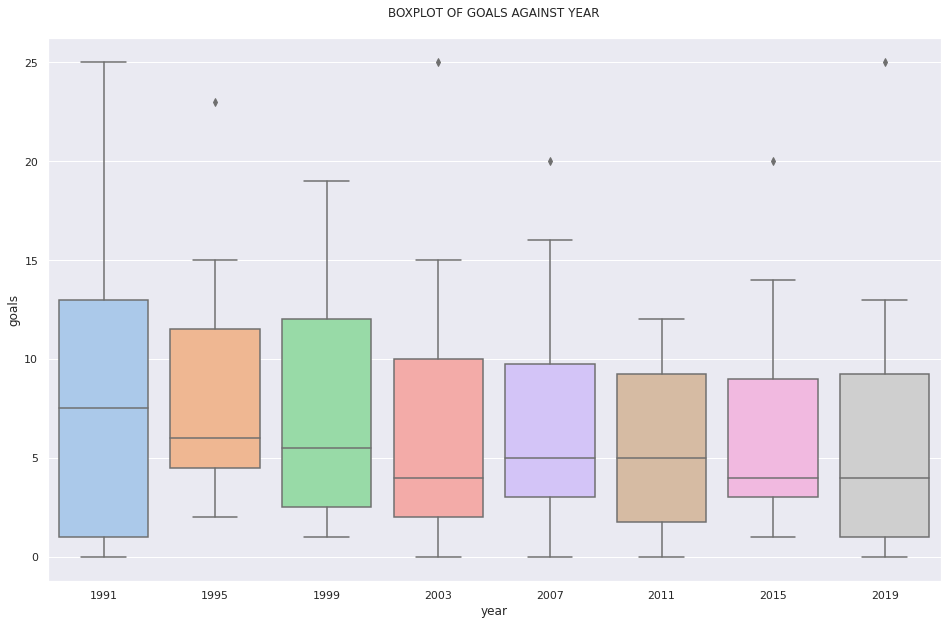

In [ ]:
plt.figure(figsize=(16,10))
sns.boxplot(x=df_1['year'], y=df_1['goals'], data=df_1, palette='pastel')
plt.title("BOXPLOT OF GOALS AGAINST YEAR\n")
plt.xlabel("year")
plt.ylabel("goals")
plt.show()

The boxplot above shows the distribution and descriptive statistics of goals scored each year and outlier values of the goals scored per year. As seen from the barchart earlier, 2011 had the highest amount of goals scored, it can be inferred from the boxplot that this is due to the outlier value exceeding the maximum value of the spread.

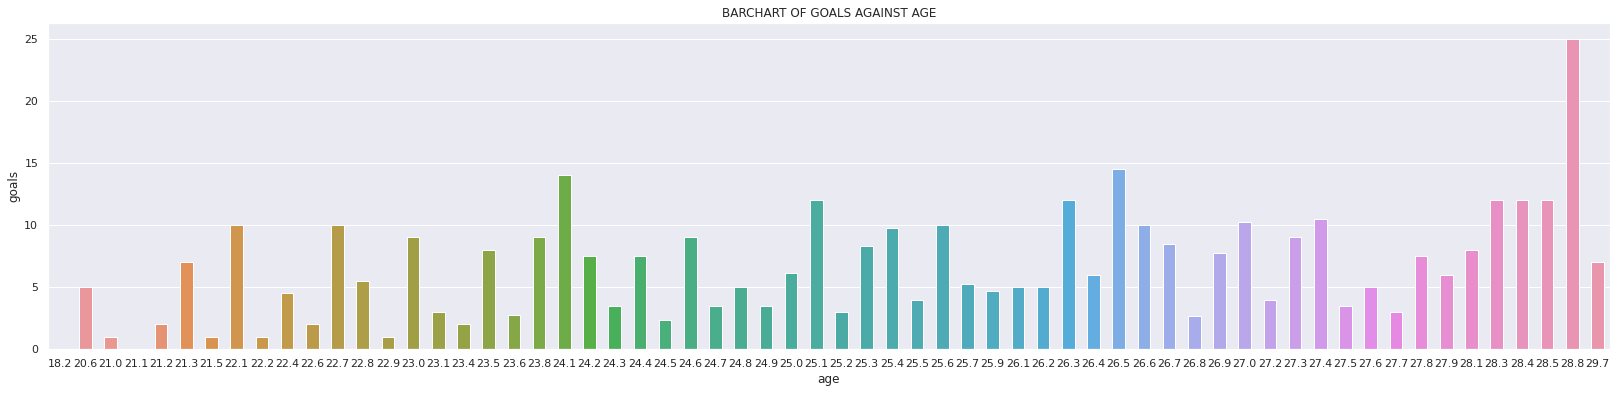

In [ ]:
# Barchart of goals against age
plt.figure(figsize=(28,6))
sns.barplot(x=df_1['age'], y=df_1['goals'], data=df_1, width=0.5, errorbar=None)
plt.title("BARCHART OF GOALS AGAINST AGE")
plt.show()

The barchart above demonstrates the no of goals scored based on age, and each age is the average age of a team. The visual shows that no of goals scored is randomly distributed across each agegroup.

### Multivariate analysis

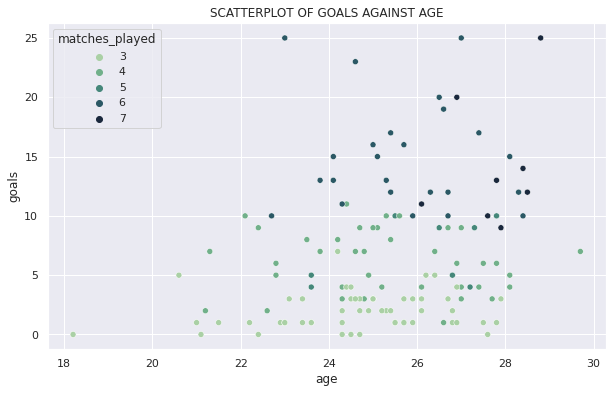

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)}) 
sns.scatterplot( data=df_1, x=df_1['age'], y=df_1['goals'], hue=df_1["matches_played"], palette="ch:r=-.5,l=.75")
plt.title("SCATTERPLOT OF GOALS AGAINST AGE")
plt.show()

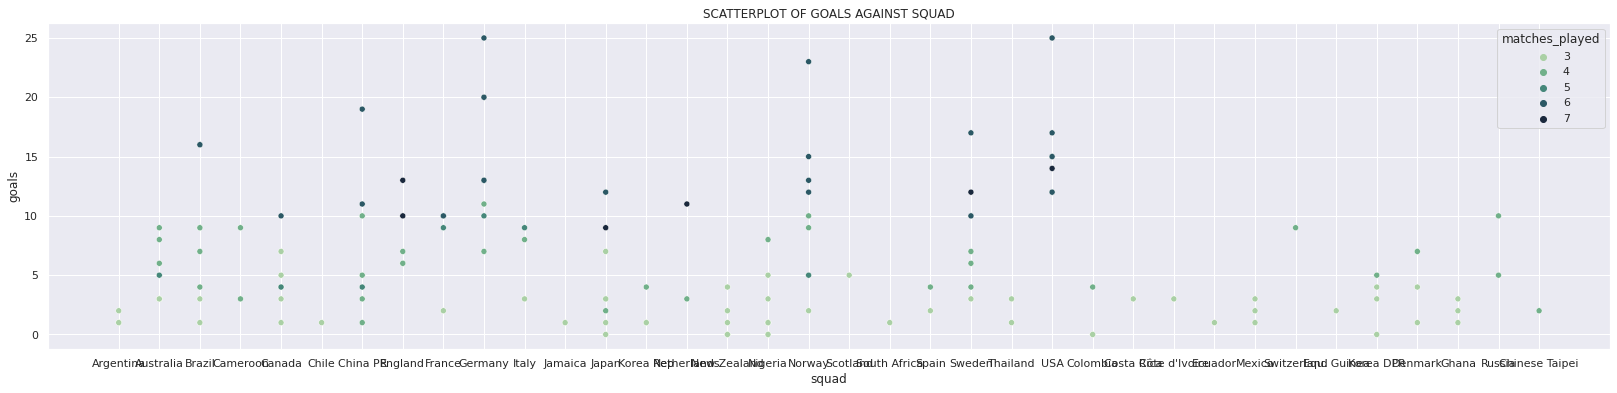

In [ ]:
sns.set(rc={"figure.figsize":(28, 6)})
sns.scatterplot( data=df_1, x=df_1['squad'], y=df_1['goals'], hue=df_1["matches_played"], palette="ch:r=-.5,l=.75")
plt.title("SCATTERPLOT OF GOALS AGAINST SQUAD")
plt.show()

The scatterplot above shows weak correlation between age and the goals scored, hence no established relationship. Although, it can be seen that as the no of matches played increased, there was an increase in no of goals scored. A strong correlation is detected beteween no of matches played and goals scored.

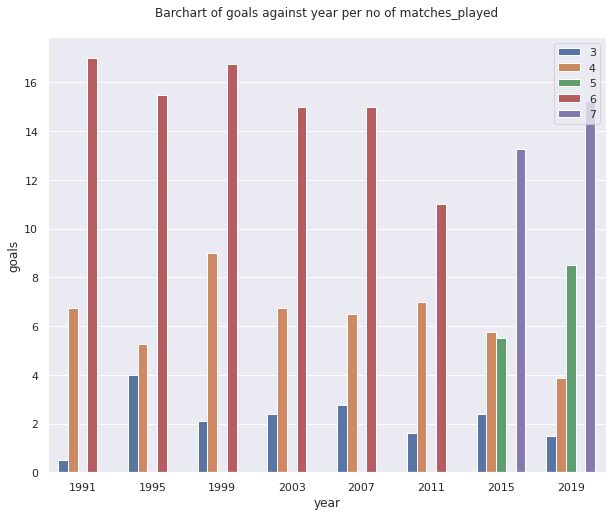

In [ ]:
# Barchart of goals against years when the women's world cup were held
plt.figure(figsize=(10,8))
sns.barplot(x=df_1['year'], y=df_1['goals'], hue=df_1['matches_played'], errorbar=None, width=0.7)
plt.title("Barchart of goals against year per no of matches_played\n")
plt.xlabel("year")
plt.ylabel("goals")
plt.legend(loc="best")
plt.show()

The barchart above shows that teams with less than 4 matches played have the general lowest amount of goals every year, and teams with the highest amount of matches played have the highest amount of goals each year. This might be because, the number of matches played is determined by qualifying rounds which teams with lower no of goals do not win, hence the lower no of goals every year.

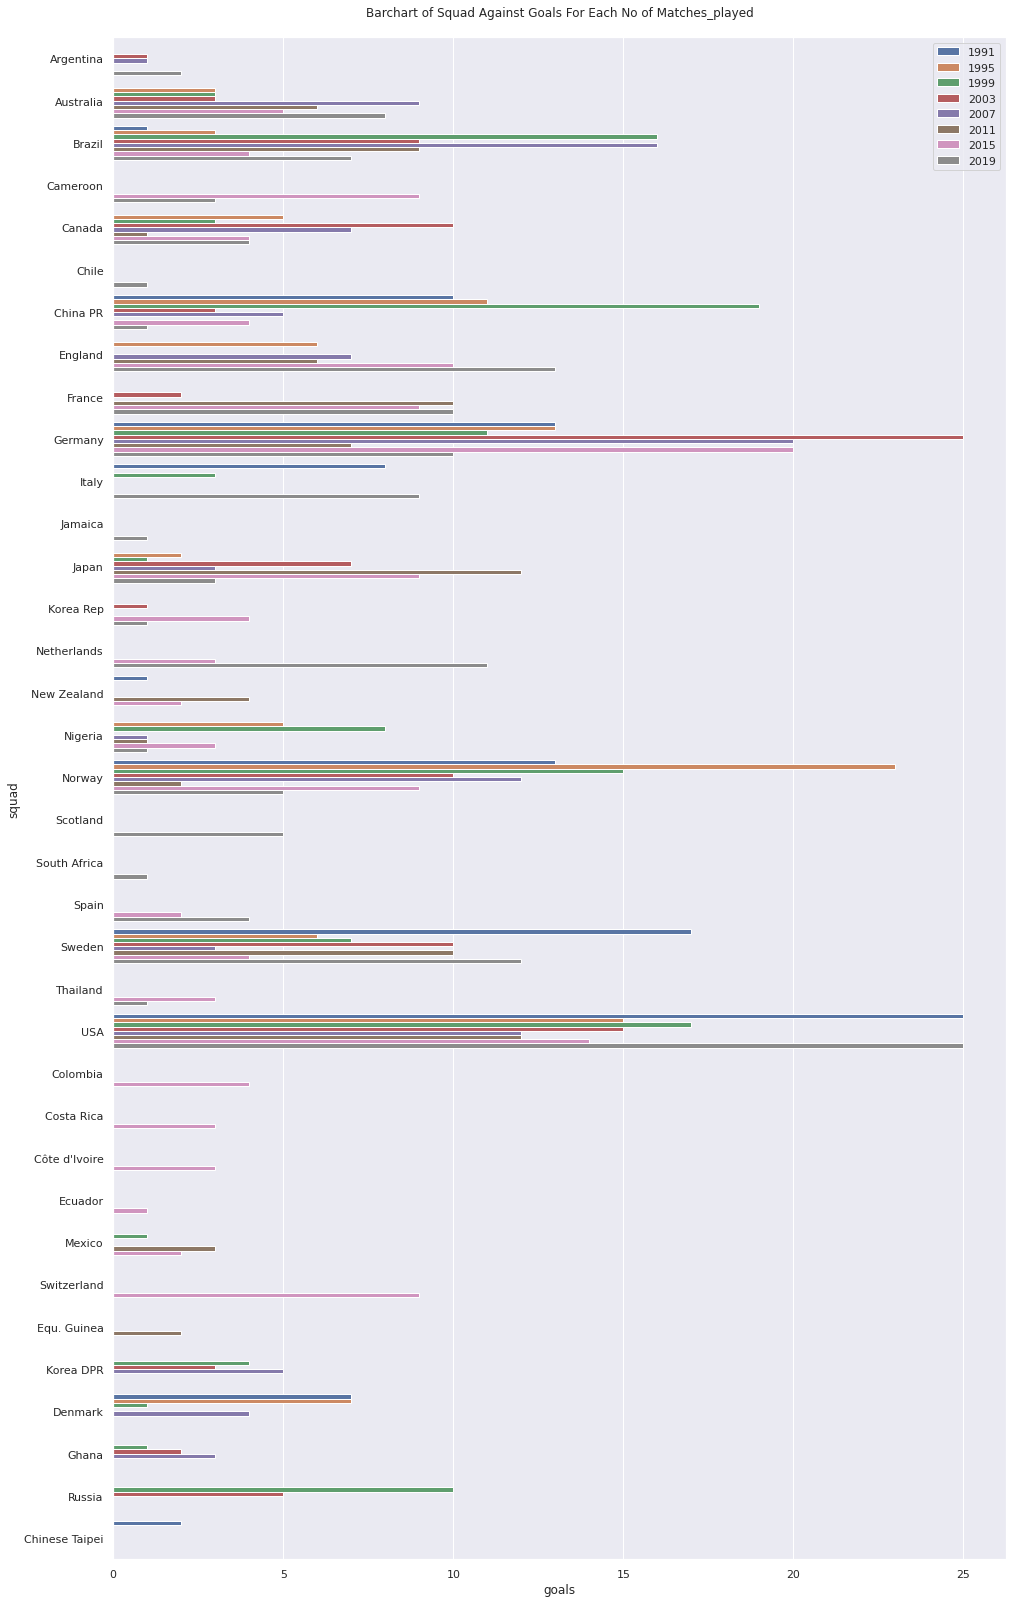

In [ ]:
plt.figure(figsize=(16,28))
sns.barplot(x=df_1['goals'], y=df_1['squad'], data=df_1, hue=df_1['year'], width=0.8)
plt.title("Barchart of Squad Against Goals For Each No of Matches_played\n")
plt.legend(loc="best")
plt.show()

The barplot above describes the goals scored by each squad, for each year of the world cup. Considering that teams with the highest amount of matches played have the highest amount of goals each year, and the number of matches played is determined by qualifying rounds; We can infer that the squads with the highest goals each year might have won the world cup.

In [ ]:
# plt.figure(figsize=(16,10))
# sns.boxplot(x=df_1['year'], y=df_1['goals'], data=df_1, palette='pastel', hue=df_1['matches_played'])
# plt.show()

In [ ]:
corr = df_1num.corr()
corr.head()

,id,year,players,age,possesion,matches_played,starts,min_playing_time,minutes_played_90s,goals,assists,non_penalty_goals,penalty_kicks_made,penalty_kicks_attempted,yellow_cards,red_cards,goals_per_90,assists_per_90,goals_plus_assists_per_90,goals_minus_penalty_kicks_per_90,goals_plus_assists_minus_penalty_kicks_per_90
id,1.000000,-0.985789,-0.498408,-0.403209,0.042391,-0.015486,-0.015486,-0.071214,-0.067704,0.173290,-0.093018,0.221320,-0.298046,-0.367175,-0.634122,-0.221449,0.246491,-0.102805,0.115471,0.304032,0.151882
year,-0.985789,1.000000,0.511166,0.419017,-0.041758,0.028127,0.028127,0.088727,0.085034,-0.156163,0.111379,-0.201654,0.284782,0.339133,0.603893,0.220126,-0.235550,0.119253,-0.100962,-0.288791,-0.134356
players,-0.498408,0.511166,1.000000,0.363935,-0.003888,0.386391,0.386391,0.404284,0.402872,0.198451,0.277781,0.160127,0.342960,0.393047,0.313773,0.236862,0.071854,0.187911,0.131888,0.029145,0.106534
age,-0.403209,0.419017,0.363935,1.000000,0.091689,0.350800,0.350800,0.393652,0.390356,0.263231,0.330427,0.230805,0.319947,0.363558,0.215110,0.052531,0.178455,0.276919,0.242013,0.140219,0.220989
possesion,0.042391,-0.041758,-0.003888,0.091689,1.000000,0.310513,0.310513,0.318976,0.318904,0.307171,0.283206,0.289117,0.228295,0.295310,-0.325653,-0.185002,0.297128,0.219773,0.293778,0.273232,0.281272


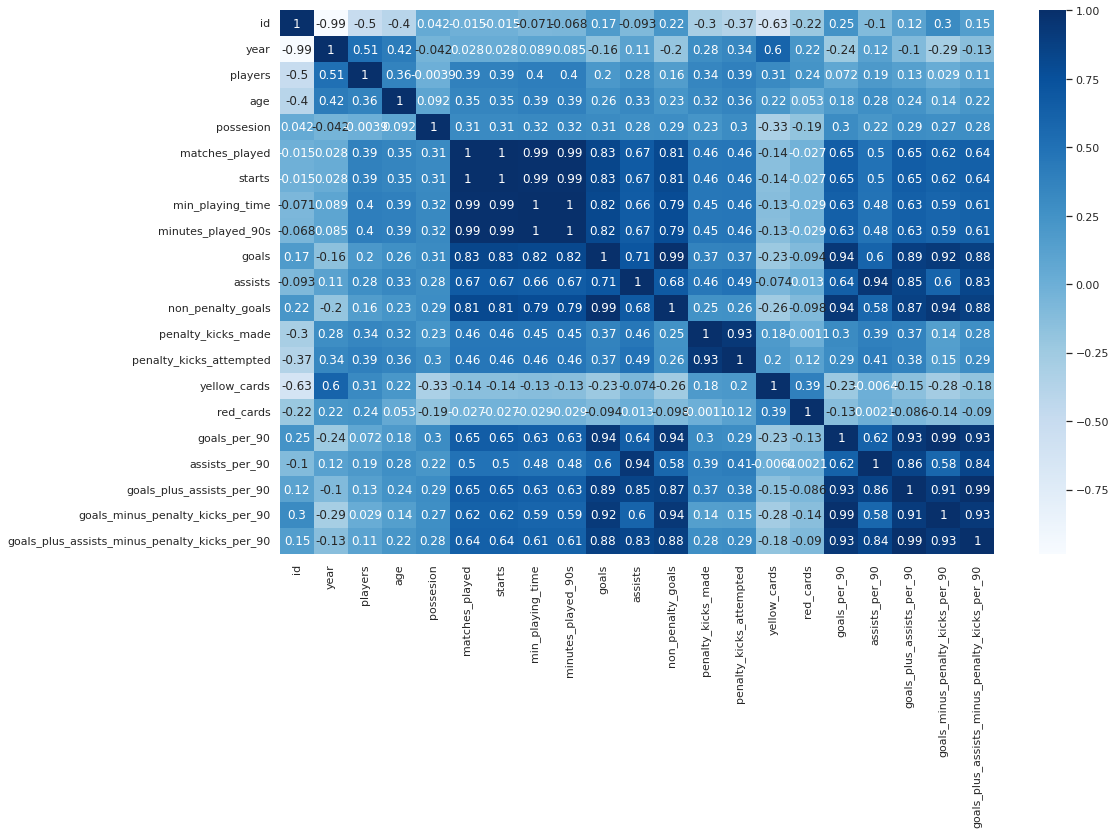

In [ ]:
# generate heatmap of correlations
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.show()


The heatmap shows correlation between each numerical variable in the dataset, which helps to determine the strength of the relationship between them.